In [17]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

full_data = pd.read_csv("/content/drive/MyDrive/Data Mining Project/Notebooks/anomaly_detection_data.csv")
full_data

Output hidden; open in https://colab.research.google.com to view.

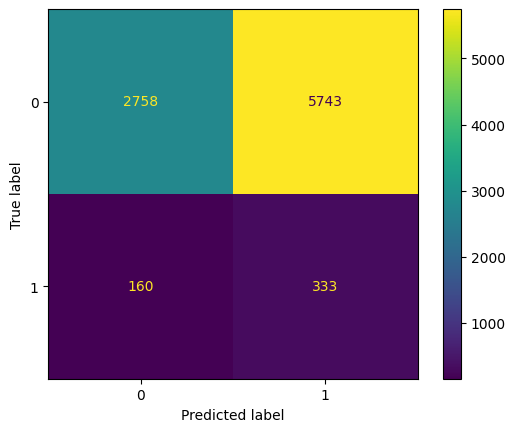

In [31]:
# only include model columns
cols = ['measurement',
       'cycle_time', #'process_avg_measurement', 'process_avg_cycletime',
       'dist_from_measure_avg', 'dist_from_ct_avg', 'operator_id_P1-2',
       'operator_id_P1-3', 'operator_id_P10-1', 'operator_id_P10-2',
       'operator_id_P10-3', 'operator_id_P10-4', 'operator_id_P10-5',
       'operator_id_P10-6', 'operator_id_P2-1', 'operator_id_P2-2',
       'operator_id_P2-3', 'operator_id_P3-1', 'operator_id_P3-2',
       'operator_id_P3-3', 'operator_id_P3-4', 'operator_id_P3-5',
       'operator_id_P4-1', 'operator_id_P4-2', 'operator_id_P4-3',
       'operator_id_P5-1', 'operator_id_P5-2', 'operator_id_P5-3',
       'operator_id_P5-4', 'operator_id_P5-5', 'operator_id_P6-1',
       'operator_id_P6-2', 'operator_id_P6-3', 'operator_id_P6-4',
       'operator_id_P6-5', 'operator_id_P6-6', 'operator_id_P7-1',
       'operator_id_P7-2', 'operator_id_P7-3', 'operator_id_P7-4',
       'operator_id_P7-5', 'operator_id_P8-1', 'operator_id_P8-2',
       'operator_id_P9-1', 'operator_id_P9-2', 'operator_id_P9-3',
       'operator_id_P9-4', 'operator_id_P9-5', 'operator_id_P9-6',
       'measurement_lag_1',
       'measurement_lag_2', 'measurement_lag_3']

# isolate model columns
X_train = full_data[cols]

# build model
clf = svm.OneClassSVM(nu=0.65, kernel="poly", gamma='auto')
pred = clf.fit_predict(X_train)

# isolate scores (for future feature engineering)
scores = clf.score_samples(X_train)

# add these columns to the original dataset
full_data['scores'] = scores
full_data['predictions'] = pred

# ensure labels and predictions align
full_data['predictions'] = full_data['predictions'].replace({-1: 1, 1: 0})
y_true = full_data['wounded']
pred = full_data['predictions']

# build confusion matrix
cm=confusion_matrix(y_true, pred)

# visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<Axes: >

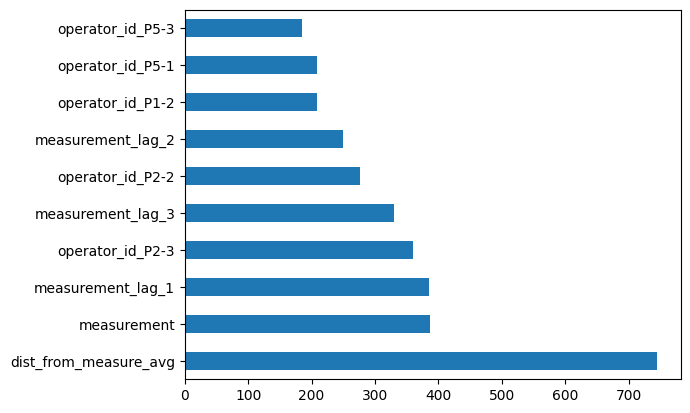

In [8]:
# feature importance visualization
pd.Series(abs(clf.coef_[0]), index=cols).nlargest(10).plot(kind='barh')

In [32]:
# calculate confusion metric metrics
def calculate_metrics(confusion_matrix):
    TT, TF, FT, FF = confusion_matrix[0][0], confusion_matrix[0][1], confusion_matrix[1][0], confusion_matrix[1][1]

    # Accuracy
    accuracy = (TT + FF) / (TT + TF + FT + FF)

    # Precision
    precision = TT / (TT + FT)

    # Recall
    recall = TT / (TT + TF)

    # F1 Score
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Negative Specificity
    n_spec = TF / (TF+FT)

    return accuracy, precision, recall, f1_score, n_spec

# calculate metrics for model
accuracy, precision, recall, f1_score, n_spec  = calculate_metrics(cm)

print(f"Accuracy: {accuracy:f}")
print(f"Precision: {precision:f}")
print(f"Recall: {recall:f}")
print(f"F1 Score: {f1_score:f}")
print(f"Specificity (Negative):{n_spec:f}")

Accuracy: 0.343674
Precision: 0.945168
Recall: 0.324432
F1 Score: 0.483055
Specificity (Negative):0.972895


In [ ]:
# hypertuning
'''
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'nu': [0.01, 0.05, 0.1, .35, 0.5],
    'gamma': ['auto', 'scale', 0.01, 0.1, 1, 10]
}
labels = full_data['wounded'].replace({1: -1, 0: 1})
# Use Grid Search to find the best hyperparameters
grid_search = GridSearchCV(svm.OneClassSVM(), param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, labels)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train)

# Print classification report
print("Classification Report:")
print(classification_report(labels, y_pred))
'''

In [ ]:
full_data.to_csv("/content/drive/MyDrive/Data Mining Project/Notebooks/anomaly_detection_output.csv")

In [ ]:
full_data.head(50)

,Unnamed: 0,timestamp,measurement,cycle_time,process_avg_measurement,process_avg_cycletime,dist_from_measure_avg,dist_from_ct_avg,operator_id_P1-2,operator_id_P1-3,...,process_id_10,measurement_lag_1,measurement_lag_2,measurement_lag_3,operator_id,wounded,process_id,unit_id,scores,predictions
0,0,0.000000,0.011195,0.132353,0.000000,0.138983,0.549110,0.079286,1.0,0.0,...,0.0,0.000000,0.000000,0.000000,P1-2,0,1,2,967.340077,0
1,1,0.002871,0.098645,0.091912,0.097058,1.000000,0.351080,0.788741,0.0,0.0,...,0.0,0.096039,0.000000,0.000000,P2-2,0,2,2,927.069817,1
2,2,0.007283,0.098645,0.198529,0.097058,0.424848,0.351080,0.051940,0.0,0.0,...,0.0,0.175985,0.096039,0.000000,P3-2,1,3,2,743.174512,1
3,3,0.010420,0.098645,0.110294,0.097058,0.166329,0.351080,0.010785,0.0,0.0,...,0.0,0.175985,0.175985,0.210441,P4-3,0,4,2,881.383643,1
4,4,0.012653,0.304236,0.047794,0.301361,0.250386,0.086031,0.189110,0.0,0.0,...,0.0,0.175985,0.175985,0.385619,P5-3,0,5,2,826.365673,1
5,5,0.015417,0.389469,0.084559,0.397901,0.362764,1.000000,0.219605,0.0,0.0,...,0.0,0.363936,0.175985,0.385619,P6-3,0,6,2,1645.269445,0
6,6,0.000904,0.000000,0.194853,0.000000,0.138983,0.666961,0.202413,0.0,1.0,...,0.0,0.000000,0.000000,0.000000,P1-3,0,1,3,1071.783130,0
7,7,0.003243,0.099851,0.055147,0.097058,1.000000,0.219519,0.861169,0.0,0.0,...,0.0,0.085805,0.000000,0.000000,P2-3,0,2,3,856.004760,1
8,8,0.007071,0.099851,0.158088,0.097058,0.424848,0.219519,0.131611,0.0,0.0,...,0.0,0.177088,0.085805,0.000000,P3-3,1,3,3,625.177568,1
9,9,0.009942,0.099851,0.091912,0.097058,0.166329,0.219519,0.025212,0.0,0.0,...,0.0,0.177088,0.177088,0.188016,P4-2,0,4,3,728.051017,1
